In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob
import os
import random

In [58]:
def detransform(data):
    
    data[2] = np.flip(data[2], 0)
    data[3] = np.negative(np.flip(data[3], 0))
    
    data[4] = np.rot90(np.negative(data[4]), k=2, axes=(0, 1))
    data[5] = np.rot90(np.negative(data[5]), k=2, axes=(0, 1))

    data[6] = np.negative(np.flip(data[6], 1))
    data[7] = np.flip(data[7], 1)
    
    return data

In [59]:
def plot_field(x, y, u, v, vmax):
    x_delta, y_delta = x[0,1]-x[0,0], y[1,0]-x[0,0]
    step0, step1 = int(u.shape[0]/32+1), int(u.shape[1]/32+1)
    
    fig = plt.figure(figsize=(12,3))
    # amplitude
    plt.imshow(np.sqrt(u**2+v**2), vmax=vmax)
    cb = plt.colorbar()
    # vector field
    plt.quiver((x[::step0, ::step1]-x[0,0])/x_delta, (y[::step0, ::step1]-y[0,0])/y_delta, 
               u[::step0, ::step1], -v[::step0, ::step1])
    plt.axis('off')

In [60]:
raft_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
un_path = '/home/panding/code/UR/piv-data/unflownet-mm'
raft = glob.glob(os.path.join(raft_path, '*.npy'))
un = glob.glob(os.path.join(un_path, '*.npy'))
raft = sorted(raft)
un = sorted(un)
assert len(raft)==len(un)

random_idx = random.randint(0, len(raft))
data_raft = np.load(raft[random_idx])
data_un = np.load(un[random_idx])
data_raft = detransform(data_raft)
data_un = detransform(data_un)
# data_raft = np.load('/home/panding/code/UR/piv-data/baseline-multimodel/cylinder_Re200_00496.npy')
# data_un = np.load('/home/panding/code/UR/piv-data/unflownet-mm/cylinder_Re200_00496.npy')
print(f"raft: {raft[random_idx]}, un: {un[random_idx]}")
truth_u = data_raft[8]
truth_v = data_raft[9]

raft: /home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_isotropic1024_hd_01957.npy, un: /home/panding/code/UR/piv-data/unflownet-mm/JHTDB_isotropic1024_hd_01957.npy


##### fig2-case1
raft: `/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_channel_hd_00572.npy`    
un: `/home/panding/code/UR/piv-data/unflownet-mt/JHTDB_channel_hd_00572.npy`

##### fig2-case2
raft: `/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_isotropic1024_hd_01994.npy`     
un: `/home/panding/code/UR/piv-data/unflownet-mt/JHTDB_isotropic1024_hd_01994.npy`

##### fig2-case3
raft: `/home/panding/code/UR/piv-data/baseline-multitransform/SQG_01455.npy`     
un: `/home/panding/code/UR/piv-data/unflownet-mt/SQG_01455.npy`


In [61]:
def MSE(arr_1, arr_2):
    mse = np.mean( (arr_1 - arr_2) ** 2 )
    return mse

def mse_print(data, u, v):
    for i in range(0, 8):
        if i % 2 == 0:
            print(MSE(data[i], u))
        else:
            print(MSE(data[i], v))

def show_origin(data):
    plt.figure(figsize=(14,3),facecolor='white')
    for i in range(0, 4, 1):
        plt.subplot(1, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[i*2])
        cbar = plt.colorbar(fraction=0.05)
        cbar.ax.tick_params(color='black', labelcolor='black')
        
    plt.show
    plt.figure(figsize=(14,3),facecolor='white')
    for i in range(0, 4, 1):
        plt.subplot(1, 4, i+1)
        # plt.title('mm_u')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[i*2+1])
        cbar = plt.colorbar(fraction=0.05)
        cbar.ax.tick_params(color='black', labelcolor='black')
    plt.show()
    
    
def show_res(data, u, v):
    plt.figure(figsize=(12,3),facecolor='white')
    for i in range(0, 4, 1):
        plt.subplot(1, 4, i+1)
        # plt.title('mm_u')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.abs(data[i*2]-u))
        cbar = plt.colorbar(fraction=0.05)
        cbar.ax.tick_params(color='black', labelcolor='black')
    plt.show
    plt.figure(figsize=(12,3),facecolor='white')
    for i in range(0, 4, 1):
        plt.subplot(1, 4, i+1)
        # plt.title('mm_u')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.abs(data[i*2+1]-v))
        cbar = plt.colorbar(fraction=0.05)
        cbar.ax.tick_params(color='black', labelcolor='black')
    plt.show()

In [62]:
def show_truth():
    plt.figure(figsize=(3,6),facecolor='white')
    plt.subplot(2, 1, 1)
    # plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth_u)
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')
    
    plt.subplot(2, 1, 2)
    # plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth_v)
    cbar = plt.colorbar(fraction=0.05)
    cbar.ax.tick_params(color='black', labelcolor='black')
# show_truth()

In [63]:
print("raft result:")
# show_origin(data_raft)
# mse_print(data_raft, truth_u, truth_v)

raft result:


In [64]:
print("un result:")
# show_origin(data_un)
# mse_print(data_un, truth_u, truth_v)

un result:


In [65]:
print("raft_res result:")
# show_res(data_raft, truth_u, truth_v)

raft_res result:


In [66]:
print("un_res result:")
# show_res(data_un, truth_u, truth_v)

un_res result:


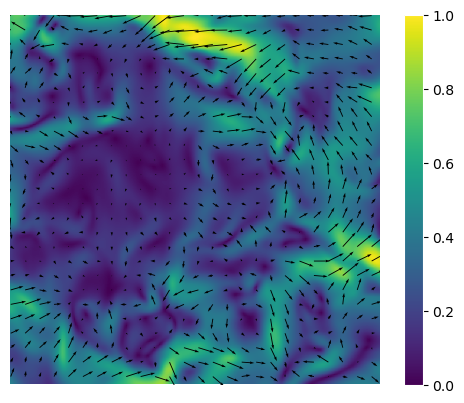

In [67]:
import numpy as np
import matplotlib.pyplot as plt

image = np.sqrt(np.square(truth_u) + np.square(truth_v))

# 假设您有两个表示流场u和v的numpy数组
u = truth_u
v = truth_v

# 创建网格点坐标
x, y = np.meshgrid(np.arange(u.shape[1]), np.arange(u.shape[0]))

# 选择箭头的间隔，可以根据需要调整
arrow_interval = 10

# 绘制箭头图像
plt.figure(facecolor='white')
plt.imshow(image)  # 假设您有一个背景图像image作为底图
plt.quiver(x[::arrow_interval, ::arrow_interval], y[::arrow_interval, ::arrow_interval],
           u[::arrow_interval, ::arrow_interval], v[::arrow_interval, ::arrow_interval], color='black')
plt.xticks([])
plt.yticks([])
plt.axis('off')

cbar = plt.colorbar(fraction=0.05)
cbar.ax.tick_params(color='black', labelcolor='black')

plt.show()

In [68]:
# def show_uv(u, v, u_t, v_t):
#     image = uv(u, v)
#     image_t = uv(u_t, v_t)
#     print(MSE(image, image_t))

#     # # 创建网格点坐标
#     # x, y = np.meshgrid(np.arange(u.shape[1]), np.arange(u.shape[0]))

#     # # 选择箭头的间隔，可以根据需要调整
#     # arrow_interval = 10

#     # # 绘制箭头图像
#     plt.figure(facecolor='white')
#     plt.imshow(np.abs(image-image_t))  # 假设您有一个背景图像image作为底图
#     # plt.quiver(x[::arrow_interval, ::arrow_interval], y[::arrow_interval, ::arrow_interval],
#     #         u[::arrow_interval, ::arrow_interval], v[::arrow_interval, ::arrow_interval], color='black')
#     plt.xticks([])
#     plt.yticks([])
#     plt.axis('off')

#     cbar = plt.colorbar(fraction=0.05)
#     cbar.ax.tick_params(color='black', labelcolor='black')

#     plt.show()
    
# def uv(u, v):
#     return np.sqrt(np.square(u) + np.square(v))

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def show_uv(data_raft, data_un, u_t, v_t):
    img_t = np.sqrt(np.square(u_t) + np.square(v_t))
    res = []
    for i in range(0, 4):
        u = data_raft[2 * i]
        v = data_raft[2 * i + 1]
        res.append(np.abs(np.sqrt(np.square(u) + np.square(v)) - img_t))
    for i in range(0, 4):
        u = data_un[2 * i]
        v = data_un[2 * i + 1]
        res.append(np.abs(np.sqrt(np.square(u) + np.square(v)) - img_t))
    res.append(img_t)
    
    for i in range(len(res)):
        fig = plt.figure(facecolor='white')
        ax = fig.add_subplot(111)
        im = ax.imshow(res[i])
        ax.axis('off')  # 隐藏坐标轴和边框
        
        # 在最后一个子图上添加共享的colorbar
        if i == len(res) - 1:
            
            x, y = np.meshgrid(np.arange(256), np.arange(256))

            # 选择箭头的间隔，可以根据需要调整
            arrow_interval = 10

            # 绘制箭头图像
            # plt.figure(facecolor='white')
            # plt.imshow(image)  # 假设您有一个背景图像image作为底图
            plt.quiver(x[::arrow_interval, ::arrow_interval], y[::arrow_interval, ::arrow_interval],
                    u[::arrow_interval, ::arrow_interval], v[::arrow_interval, ::arrow_interval], color='black')
            plt.xticks([])
            plt.yticks([])
            # plt.axis('off')
            
            divider = make_axes_locatable(ax)  # 创建可分离的colorbar轴
            cax = divider.append_axes('right', size='5%', pad=0.05)  # 指定colorbar的位置和大小
            cax.tick_params(color='black', labelcolor='black')
            fig.colorbar(im, cax=cax)

        plt.show()

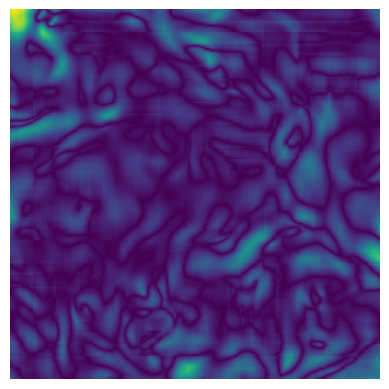

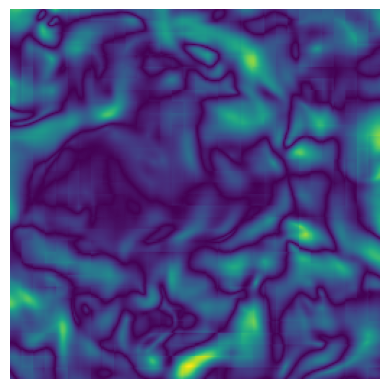

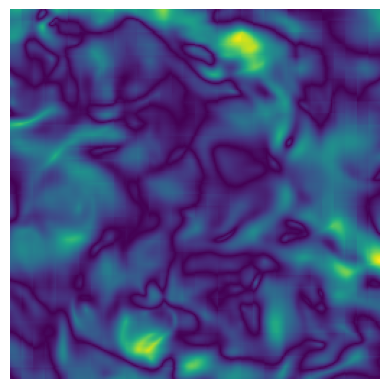

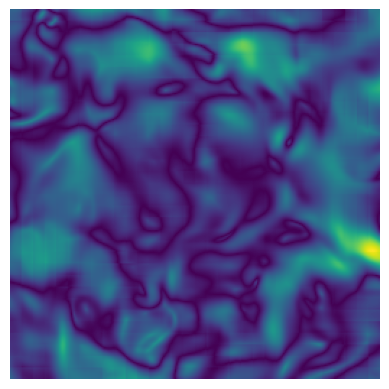

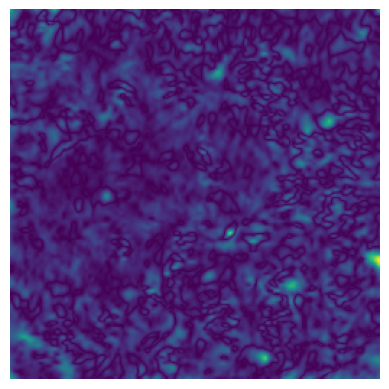

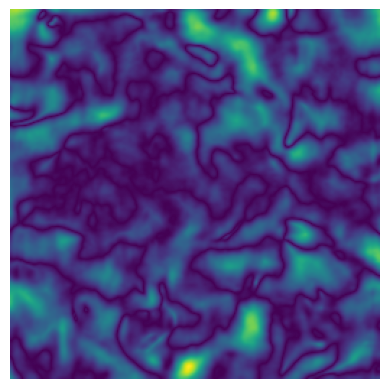

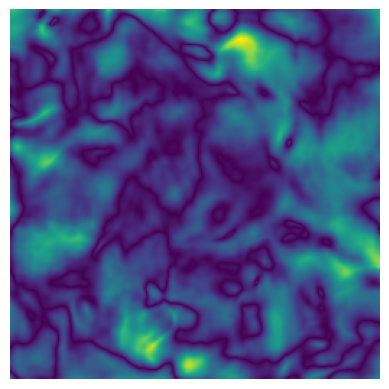

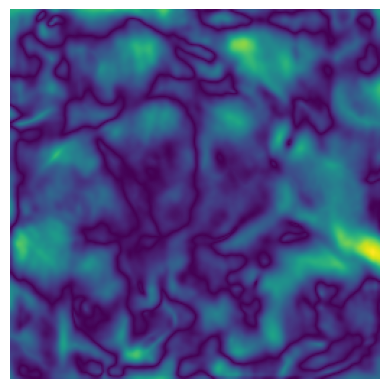

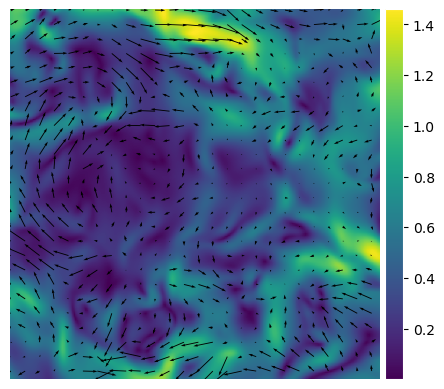

In [70]:
show_uv(data_raft, data_un, truth_u, truth_v)